# **Kümeleme Metrikleri** - (*dirsek yöntemine alternatifler*)

*Kümeleme, veri bilimi kullanan ticari veya bilimsel kuruluşlar için makine öğrenimi hattının önemli bir parçasıdır. Adından da anlaşılacağı gibi, aksi takdirde anlamlandırılması zor olan bir veri bloğundaki birbiriyle yakından ilişkili (bazı mesafe ölçülerine göre) veri noktalarının kümelenmesini tanımlamaya yardımcı olur.*

*K-ortalamalar kümelemesi gibi popüler bir yöntem, temel soruyu sorduğumuzda tamamen tatmin edici bir cevap vermiyor gibi görünüyor:*



> ***"Başlangıç olarak kümelerin gerçek sayısını nasıl bilebiliriz?"***

*Bu soru, kümeleme işleminin genellikle bireysel küme verilerinin daha fazla işlenmesinin bir öncüsü olması ve bu nedenle hesaplama kaynağı miktarının bu ölçüme bağlı olabilmesi nedeniyle kritik öneme sahiptir.*

*Bir iş analitiği problemi söz konusu olduğunda, yankı daha kötü olabilir. Kümeleme genellikle pazar segmentasyonu amacıyla bu tür analizler için yapılır. Bu nedenle, küme sayısına bağlı olarak, uygun pazarlama personelinin soruna tahsis edileceği kolayca düşünülebilir. Sonuç olarak, küme sayısının yanlış değerlendirilmesi, değerli kaynakların optimumun altında tahsis edilmesine yol açabilir.*

*K-ortalamalar kümeleme yöntemi için, bu soruyu yanıtlamaya yönelik en yaygın yaklaşım dirsek yöntemi olarak adlandırılan yöntemdir. Bu yöntem, artan sayıda küme seçimi ile algoritmanın bir döngü üzerinde birden çok kez çalıştırılmasını ve ardından küme sayısının bir fonksiyonu olarak bir kümeleme skorunun çizilmesini içerir.*

*Bu not defterinde, en uygun küme sayısını görselleştirmek ve belirlemek için hangi metriğin kullanılacağını olağan uygulamadan (dirsek yöntemi) çok daha iyi bir şekilde gösteriyoruz.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# **Scikit learn make_blob yöntemini kullanarak sentetik veri oluşturma**

▶ Özellik sayısı: 4
▶ Küme sayısı: 5
▶ Örnek sayısı: 200

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [3]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [8]:
data1 = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_cluster, cluster_std=cluster_std)

In [9]:
d1 = data1[0]

In [10]:
df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-7.596342,-7.347218,-6.204781,-2.707742
1,-5.397594,-5.987551,-6.568777,-3.310444
2,-5.735051,6.005925,9.587516,-4.727888
3,6.570738,9.449572,-7.236288,1.429258
4,10.020179,9.906171,-10.534732,0.782055


In [11]:
from itertools import combinations

In [12]:
lst_vars = list(combinations(df1.columns, 2))

In [13]:
len(lst_vars)

6

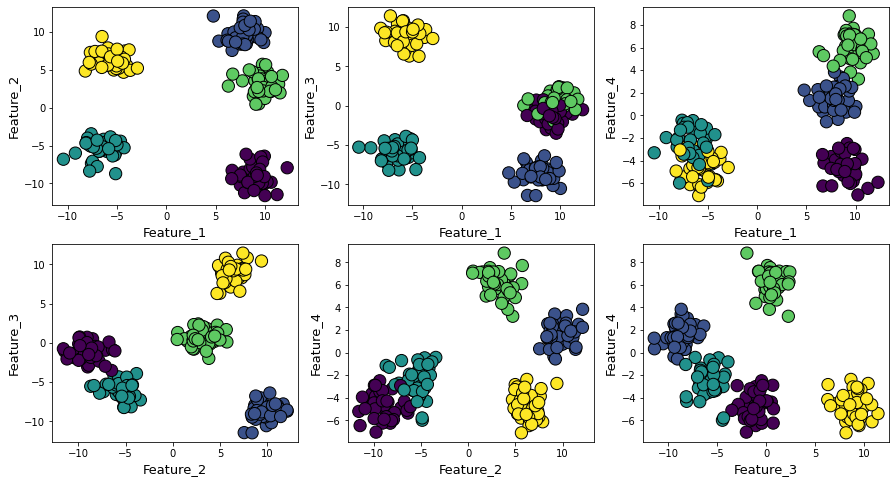

In [14]:
plt.figure(figsize=(15, 8))
for i in range(1,7):
  plt.subplot(2, 3, i)
  dim1 = lst_vars[i-1][0]
  dim2 = lst_vars[i-1][1]
  plt.scatter(df1[dim1], df1[dim2], c = data1[1], edgecolor = 'k', s = 150)
  plt.xlabel(f"{dim1}", fontsize = 13)
  plt.ylabel(f"{dim2}", fontsize = 13)


# **Sınıflar nasıl ayrılmıştır (boxplots)**

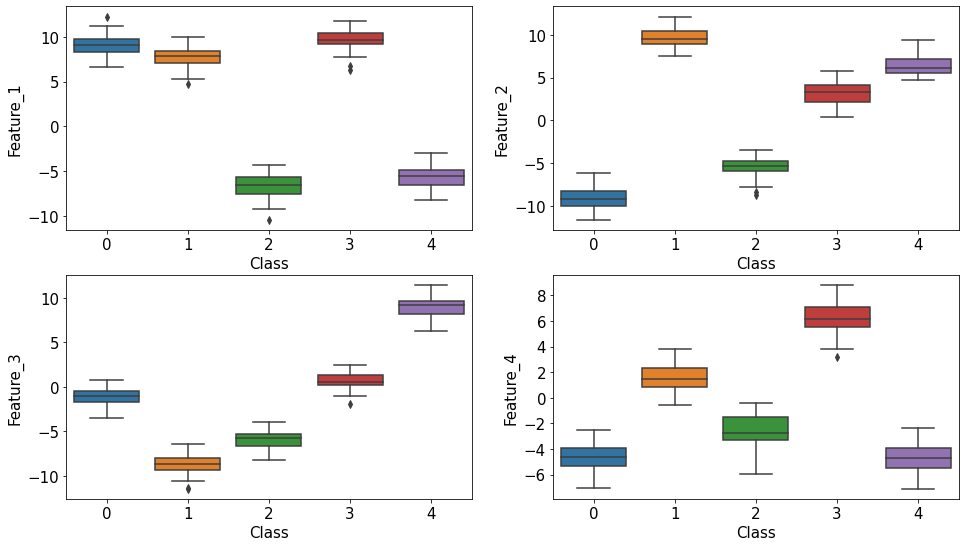

In [16]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df1[c],x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

# **k-ortalamalar kümeleme**

In [17]:
from sklearn.cluster import KMeans

# **Etkin olmayan veriler**

In [18]:
X = df1

In [19]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-7.596342,-7.347218,-6.204781,-2.707742
1,-5.397594,-5.987551,-6.568777,-3.310444
2,-5.735051,6.005925,9.587516,-4.727888
3,6.570738,9.449572,-7.236288,1.429258
4,10.020179,9.906171,-10.534732,0.782055


In [20]:
y = data1[1]

# **Ölçeklendirme**

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_scaled = scaler.fit_transform(X)

# **Metrikler**

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

# **Çeşitli k değerleri için k-ortalamalar çalıştırma ve kümeler arası mesafe puanını hesaplama**

In [25]:
km_scores = []
km_silhouette = []
vmeasure_score = []
db_score = []
for i in range(2, 12):
  km = KMeans(n_clusters = i, random_state = 0).fit(X_scaled)
  preds = km.predict(X_scaled)

  print("Score for number of cluster(s) {}: {}".format(i, km.score(X_scaled)))
  km_scores.append(-km.score(X_scaled))

  silhouette = silhouette_score(X_scaled, preds)
  km_silhouette.append(silhouette)
  print("Silhouette score for number of cluster(s) {}: {}".format(i, silhouette))

  db = davies_bouldin_score(X_scaled, preds)
  db_score.append(db)
  print("Davies Bouldin score for number of cluster(s) {}: {}".format(i, db))

  v_measure = v_measure_score(y, preds)

  vmeasure_score.append(v_measure)
  print("V-measure score for number of cluster(s) {}: {}".format(i, v_measure))
  print("-"*100)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score for number of cluster(s) 2: -39.44007527670065
Silhouette score for number of cluster(s) 2: 0.45861379028924654
Davies Bouldin score for number of cluster(s) 2: 1.0295709322876383
V-measure score for number of cluster(s) 2: 0.5897275217561558
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -20.302752684963902
Silhouette score for number of cluster(s) 3: 0.5997481005210489
Davies Bouldin score for number of cluster(s) 3: 0.7576852837477107
V-measure score for number of cluster(s) 3: 0.7918756684685209
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score for number of cluster(s) 4: -9.157926296635644
Silhouette score for number of cluster(s) 4: 0.7171712094440303
Davies Bouldin score for number of cluster(s) 4: 0.45224957503376156
V-measure score for number of cluster(s) 4: 0.905746099275519
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -2.496997942587528
Silhouette score for number of cluster(s) 5: 0.7841255049135541
Davies Bouldin score for number of cluster(s) 5: 0.30804289976466104
V-measure score for number of cluster(s) 5: 1.0
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score for number of cluster(s) 6: -2.314367940630131
Silhouette score for number of cluster(s) 6: 0.6780432357222508
Davies Bouldin score for number of cluster(s) 6: 0.652885755175411
V-measure score for number of cluster(s) 6: 0.958996688324508
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -2.1716592442931546
Silhouette score for number of cluster(s) 7: 0.5698001606444487
Davies Bouldin score for number of cluster(s) 7: 0.941365571810664
V-measure score for number of cluster(s) 7: 0.9220218170677574
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score for number of cluster(s) 8: -2.0214815609131027
Silhouette score for number of cluster(s) 8: 0.4582683527495844
Davies Bouldin score for number of cluster(s) 8: 1.13299029224528
V-measure score for number of cluster(s) 8: 0.8859464586468305
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -1.9036973199608336
Silhouette score for number of cluster(s) 9: 0.34292202501583413
Davies Bouldin score for number of cluster(s) 9: 1.3213358580694285
V-measure score for number of cluster(s) 9: 0.8546365866464889
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score for number of cluster(s) 10: -1.8269518138280043
Silhouette score for number of cluster(s) 10: 0.3347665660082509
Davies Bouldin score for number of cluster(s) 10: 1.3670560665735345
V-measure score for number of cluster(s) 10: 0.8381341175989022
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score for number of cluster(s) 11: -1.7027681339103236
Silhouette score for number of cluster(s) 11: 0.24439647367405093
Davies Bouldin score for number of cluster(s) 11: 1.3914883870125834
V-measure score for number of cluster(s) 11: 0.8127372988518653
----------------------------------------------------------------------------------------------------


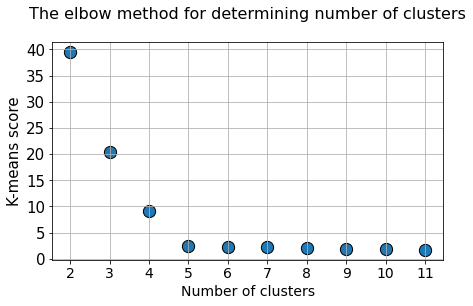

In [26]:
plt.figure(figsize=(7, 4))
plt.title("The elbow method for determining number of clusters\n", fontsize = 16)
plt.scatter(x=[i for i in range(2, 12)], y = km_scores, s = 150, edgecolor = 'k')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("K-means score", fontsize = 15)
plt.xticks([i for i in range(2, 12)], fontsize = 14)
plt.yticks(fontsize = 15)
plt.show()

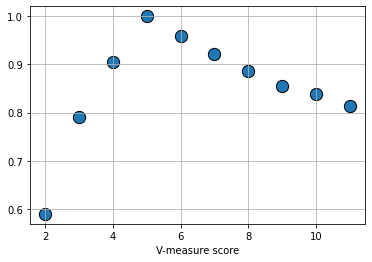

In [27]:
plt.scatter(x=[i for i in range(2, 12)], y = vmeasure_score, s = 150, edgecolor = 'k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

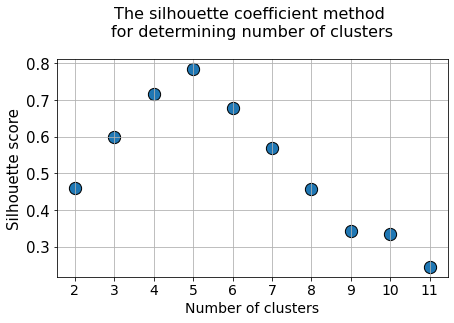

In [29]:
plt.figure(figsize=(7, 4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n", fontsize = 16)
plt.scatter(x = [i for i in range(2,12)], y=km_silhouette, s=150, edgecolor = 'k')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize = 14)
plt.ylabel("Silhouette score", fontsize = 15)
plt.xticks([i for i in range(2, 12)], fontsize = 14)
plt.yticks(fontsize = 15)
plt.show()

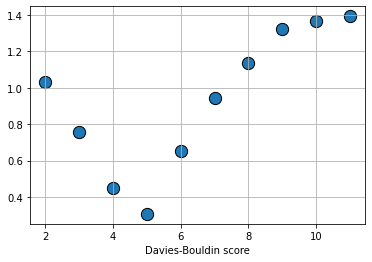

In [30]:
plt.scatter(x=[i for i in range(2, 12)], y = db_score, s=150, edgecolor = 'k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

# **Beklenti-maksimizasyonu (Gauss Karışım Modeli)**

In [31]:
from sklearn.mixture import GaussianMixture

In [32]:
gm_bic = []
gm_score = []
for i in range(2, 12):
  gm = GaussianMixture(n_components=i, n_init=10, tol=1e-3, max_iter=1000).fit(X_scaled)
  print("BIC for number of cluster(s) {}: {}".format(i, gm.bic(X_scaled)))
  print("Log-likehood score for number of cluster(s) {}: {}".format(i, gm.score(X_scaled)))
  print("-"*100)
  gm_bic.append(-gm.bic(X_scaled))
  gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -792.1963605484742
Log-likehood score for number of cluster(s) 2: 2.3646189104459183
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -1151.54714122002
Log-likehood score for number of cluster(s) 3: 3.4616827633703338
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -1279.7531485850445
Log-likehood score for number of cluster(s) 4: 3.980884683028447
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -1392.1092582113602
Log-likehood score for number of cluster(s) 5: 4.460461858339787
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -1335.982206910145
Log-likehood score for number of cluster(s) 6: 4.5188311313323
---------------

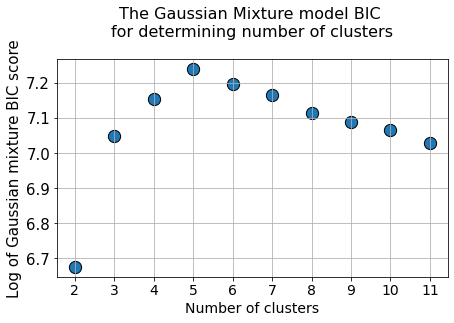

In [33]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

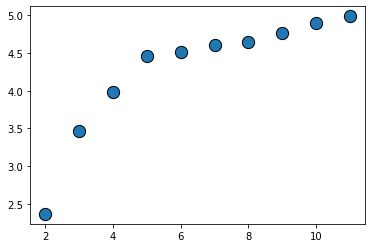

In [34]:
plt.scatter(x=[i for i in range(2,12)],y=gm_score,s=150,edgecolor='k')
plt.show()